In [1]:
# ----------------------------
#  find SNR
# ----------------------------
def find_snr(pw, code_n, code_r, theta):
    side_left  = 0.0
    side_right = 8.0
    ans        = (side_left+side_right)/2
    A          = math.sqrt(2*code_r*10**(ans/10.0)) 
    pw_est     = qfunc(code_n, theta, A)
    while abs(pw_est-pw) > abs(pw)*epsilon :
        if pw_est > pw :
            side_left  = ans    
        else :
            side_right = ans
        ans    = (side_left+side_right)/2
        A      = math.sqrt(2*code_r*10**(ans/10.0))
        pw_est = qfunc(code_n, theta, A)
    #print "snr = %f, pw = %f" % (ans, pw_est) 
    return ans
 
# ----------------------------
#  return q_func
# ----------------------------
def qfunc(code_n, theta, A):
    #print "n = %f, theta = %f, A = %f" %(code_n, theta, A)
    gv  = gfunc(theta, A)
    ans = math.log(gv*theta)
    ans = ans - (A**2-A*gv*math.sqrt(1-theta**2))/2
    ans = code_n*ans
    ans = ans - math.log(code_n*math.pi)/2
    ans = ans - math.log(1+gv**2)/2
    ans = ans - math.log(theta)
    ans = ans - math.log(A*gv*theta**2 - math.sqrt(1-theta**2))
    ans = ans / math.log(10)
    return ans
 
# ----------------------------
#  return g_func
# ----------------------------
def gfunc(theta, A):
    return (A*math.sqrt(1-theta**2)+math.sqrt( A*A*(1-theta**2)+4 ))/2
 
# ----------------------------
#  return theta
# ----------------------------
def find_angle(n,k):
    value = math.log(2*math.pi*n,2)/2 - k
    #print "n = %d, k = %d, value = %f" %(n,k,value)
 
    side_left  = 0.00001
    side_right = 1
    ans        = (side_left+side_right)/2
    cos_ans    = math.sqrt(1-ans**2)
    value_est  = (n-1)*math.log(ans,2)-math.log(cos_ans,2)
    while abs(value_est-value) > abs(value)*epsilon :
        if value_est > value :
            side_right = ans    
        else :
            side_left  = ans
        ans       = (side_left+side_right)/2
        cos_ans   = math.sqrt(1-ans**2)
        value_est = (n-1)*math.log(ans,2)-math.log(cos_ans,2)
 
    #print "value_est = %f" % value_est
    return ans

N = 100.000000, SNR = 3.297546
N = 125.892541, SNR = 3.022522
N = 158.489319, SNR = 2.764496
N = 199.526231, SNR = 2.523407
N = 251.188643, SNR = 2.298950
N = 316.227766, SNR = 2.090698
N = 398.107171, SNR = 1.898193
N = 501.187234, SNR = 1.720734
N = 630.957344, SNR = 1.557556
N = 794.328235, SNR = 1.407928
N = 1000.000000, SNR = 1.271164
N = 1258.925412, SNR = 1.146347
N = 1584.893192, SNR = 1.032608
N = 1995.262315, SNR = 0.929344
N = 2511.886432, SNR = 0.835579
N = 3162.277660, SNR = 0.750771
N = 3981.071706, SNR = 0.674011
N = 5011.872336, SNR = 0.604622
N = 6309.573445, SNR = 0.542110
N = 7943.282347, SNR = 0.485756
N = 10000.000000, SNR = 0.435089
N = 12589.254118, SNR = 0.389423
N = 15848.931925, SNR = 0.348488
N = 19952.623150, SNR = 0.311701
N = 25118.864315, SNR = 0.278702
N = 31622.776602, SNR = 0.249088
N = 39810.717055, SNR = 0.222586
N = 50118.723363, SNR = 0.198862
N = 63095.734448, SNR = 0.177620
N = 79432.823472, SNR = 0.158590


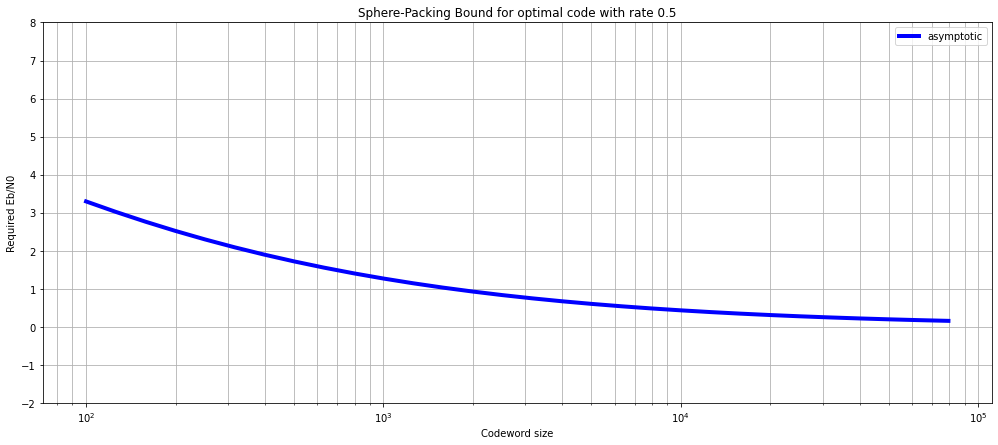

In [28]:
import matplotlib.pyplot as pyplot
import math
pyplot.rcParams["figure.figsize"] = (17,7)

epsilon = 0.00001
# Code Rate
code_r = 0.5  
#Frame Error Rate (FER, Block Error Rate, BLER)
fer    = 0.00001   
px     = [10**(ii*0.1) for ii in range( 20, 50)]
py     = [0            for ii in range( 20, 50)]
for ii, px_ii in enumerate(px):
    code_n = px_ii
    code_k = code_n*code_r
    theta  = find_angle(code_n, code_k)
    py[ii] = find_snr(math.log10(fer), code_n, code_r, theta)
    print ("N = %f, SNR = %f" % (code_n, py[ii]))
 
    # figure
pyplot.plot(px,py, color='blue', lw=4, label='asymptotic')    
pyplot.title("Sphere-Packing Bound for optimal code with rate " + str(code_r))
pyplot.grid(True, which="both", ls='-')
pyplot.legend( loc='upper right' )
pyplot.xlabel("Codeword size")
pyplot.ylabel("Required Eb/N0")
pyplot.xscale("log")
##    pyplot.xticks([i*30 for i in range(0,12)])
pyplot.yticks([-2.0+1.0*i for i in range(0,11)])
pyplot.show()